In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings(action= 'ignore')

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df=df.drop('Cabin',axis = 1)

In [7]:
median_age = df['Age'].median()
median_age

28.0

In [8]:
df['Age']= df['Age'].fillna(median_age)

In [9]:
print(median_age)

28.0


In [10]:
df['Embarked']=df['Embarked'].fillna('U')

In [11]:
df.to_csv('cleans_titanic_data.csv')

In [12]:
gender_columns = pd.get_dummies(df['Sex'], prefix = 'Sex')
embarked_columns = pd.get_dummies(df['Embarked'],prefix = 'Pclass')
df=pd.concat([df,gender_columns],axis=1)
df=pd.concat([df,embarked_columns],axis=1)
df= df.drop(['Sex', 'Embarked'], axis = 1)
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Pclass_C,Pclass_Q,Pclass_S,Pclass_U
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,0,1,0,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,1,0,0,0,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,1,0,0,0,1,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,0,1,1,0,0,0


In [13]:
df = df.drop(['Name', 'Ticket'],axis = 1)

In [14]:
Features = df.drop('Survived',axis = 1)
Target = df['Survived']
X_train,X_test,Y_train,Y_test = train_test_split(Features,Target,test_size= 0.20,shuffle = True,random_state = 100)

In [15]:
knn_GS =KNeighborsClassifier()
param_grid = {'n_neighbors':np.arange(1,100)}
knn_gscv = GridSearchCV(knn_GS,param_grid,cv=5)
knn_gscv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [16]:
knn_gscv.best_params_

{'n_neighbors': 23}

In [17]:
knn_gscv.best_score_

0.6824780852949868

In [18]:
y_pred= knn_gscv.predict(X_test)

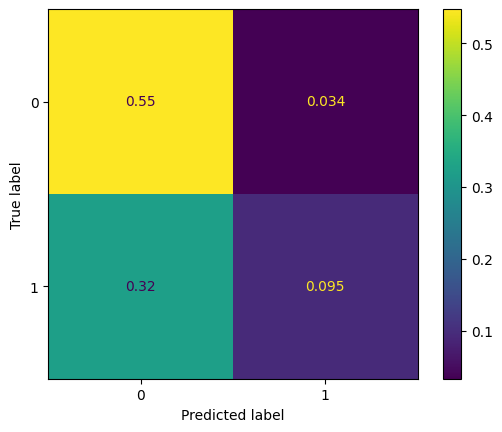

In [19]:
cm = confusion_matrix(Y_test,y_pred,normalize='all')
cmd= ConfusionMatrixDisplay(cm)
cmd.plot()
plt.savefig('CM.png')

In [20]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression().fit(X_train,Y_train)
y_pred = reg.predict(X_test)
confusion_matrix(Y_test,y_pred)

array([[91, 13],
       [23, 52]])

In [21]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.83       104
           1       0.80      0.69      0.74        75

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [23]:
from sklearn.svm import SVC
model = SVC().fit(X_train,Y_train)
y_pred= model.predict(X_test)
confusion_matrix(Y_test,y_pred)

array([[102,   2],
       [ 68,   7]])

In [24]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.98      0.74       104
           1       0.78      0.09      0.17        75

    accuracy                           0.61       179
   macro avg       0.69      0.54      0.46       179
weighted avg       0.67      0.61      0.50       179



In [25]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(),param_grid)
grid.fit(X_train,Y_train)
y_pred = grid.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79       104
           1       0.72      0.63      0.67        75

    accuracy                           0.74       179
   macro avg       0.74      0.73      0.73       179
weighted avg       0.74      0.74      0.74       179



In [27]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train,Y_train)
y_pred = reg.predict(X_test)

In [30]:
reg.score(Features,Target)

0.39755299812552447